In [111]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
from chxanalys.chx_libs import markers, colors, cmap_vge, cmap_albula


import pandas as pds
#%reset -f  #for clean up things in the memory

# Define Result Path here

In [373]:
data_dir = '/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'
data_dir_tif = '/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/epxort_tif/'

# Build a uid dictionary here

In [6]:
uid = 'uid=Protein_sample_MIT'

In [7]:
extract_dict = extract_xpcs_results_from_h5( filename = uid + '_Res.h5', import_dir = data_dir )

In [8]:
extract_dict.keys()

dict_keys(['iqst', 'g2_fit_paras', 'pixel_mask', 'q_saxs', 'g2', 'qt', 'g2b', 'g2b_fit_paras', 'times_roi', 'imgsum', 'tausb', 'qval_dict', 'qval_dict_p', 'wat', 'g12b', 'iq_saxs', 'taus', 'roi_mask', 'avg_img', 'qval_dict_v', 'md', 'mask', 'mean_int_sets'])

In [10]:
g2 = extract_dict['g2']
taus = extract_dict['taus']
qval_dict = extract_dict['qval_dict']

In [13]:
fit_g2_func = 'stretched'
scat_geometry = 'saxs'



In [207]:
g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
    function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
    fit_variables={'baseline': True, 'beta':True, 'alpha': True,'relaxation_rate':True},
    guess_values={'baseline':1.0,'beta':0.08,'alpha':1.0,'relaxation_rate':0.01,},
    guess_limits = dict( baseline =[0.5, 2.5], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.001, 100]) 
                                                    )

g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= uid  +'_g2_fit_paras.csv', path=data_dir )

The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/77f73345_g2_fit_paras.csv


In [209]:
g2_fit_paras

,baseline,alpha,beta,relaxation_rate
0,1.028219,1.481648,0.064600,16.282790
1,1.046521,1.581739,0.083908,21.453011
2,1.011762,1.629693,0.082969,25.041075
3,1.080022,1.635652,0.084056,28.513157
4,1.084730,1.492863,0.078287,31.983232
5,1.034266,1.471263,0.067485,34.779929
6,1.015210,0.998984,0.073102,41.908734
7,1.012122,1.965179,0.051071,60.392563
8,1.016420,1.999999,0.037476,56.153064
9,1.017085,0.859907,0.040601,47.211016


In [210]:
#g2_fit_paras

In [204]:
from chxanalys.chx_libs import markers, colors

<IPython.core.display.Javascript object>


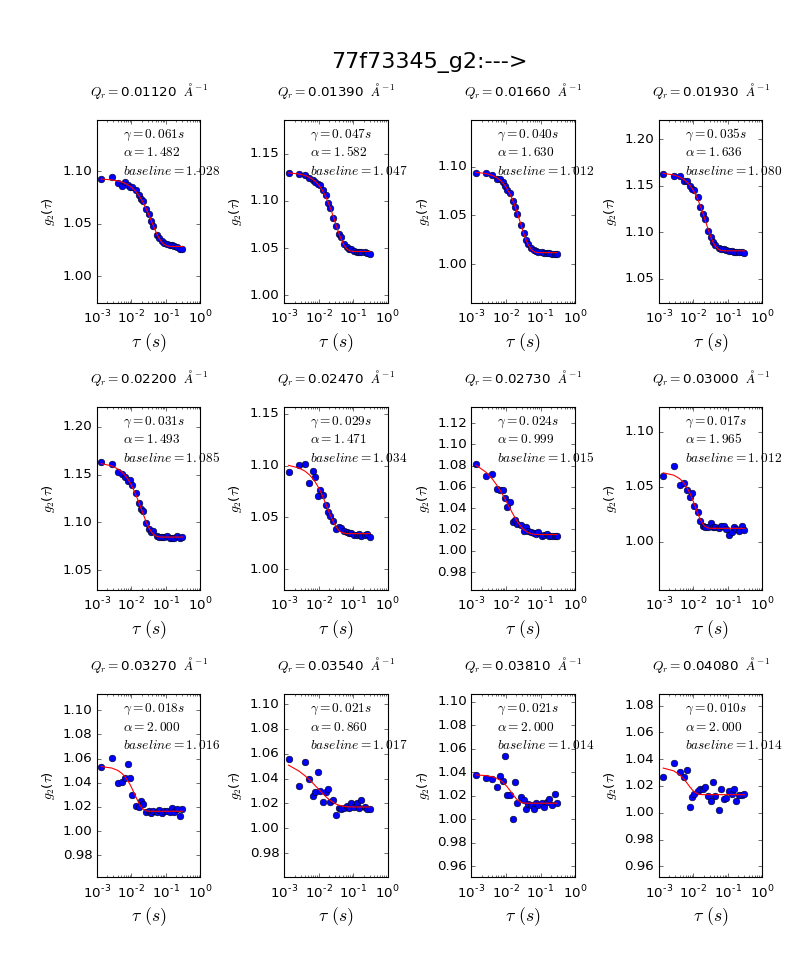

In [211]:
plot_g2_general( g2_dict={1:g2, 2:g2_fit}, taus_dict={1:taus, 2:taus_fit},vlim=[0.95, 1.05],
    qval_dict = qval_dict, fit_res= g2_fit_result,  geometry= scat_geometry,filename= uid +'_g2', 
        path= data_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_fit')



In [226]:
list( range( g2.shape[1] - 6   ))

[0, 1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


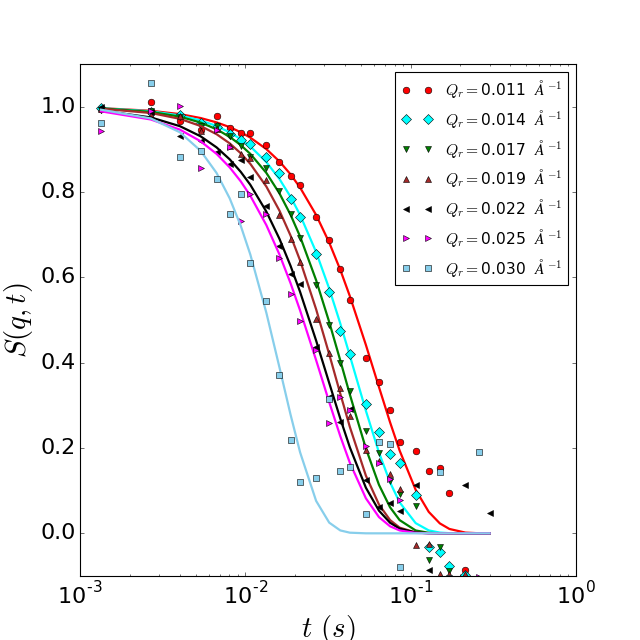

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


7


In [374]:
i=0
fig,ax=plt.subplots( figsize=(8, 8) )
for qth in list( range( g2.shape[1] - 6   )) + [ 7 ] :
#for qth in list( range( g2.shape[1] - 0   ))  :    
    i +=1
    x = taus[1:]
    delta =  g2[1:,qth] - g2_fit_paras['baseline'][qth] 
    g2i = np.sqrt(   np.abs( delta )  / g2_fit_paras['beta'][qth]    ) * np.sign( delta  )
    g1_fit = np.exp( -   (g2_fit_paras['relaxation_rate'][qth] * x )** g2_fit_paras['alpha'][qth]  )
    
    plot1D( x =  x, y= g1_fit, marker = '', color= colors[i], ls = '-', lw= 2 ,
            ax=ax,      logx=True,  legend= None,     ) 
        
    plot1D( x =  x, y= g2i, marker = markers[qth], color= colors[i], ls = '',
            ax=ax,      logx=True, 
           legend= r'$Q_r= $'+'%.3f  '%( qval_dict[qth][0]  ) + r'$\AA^{-1}$', legend_size = 14, 
           ylim=[-0.1, 1.1], 
           xlabel=r"$t $ $(s)$",  
           ylabel =   r"$S(q,t)$"   )   
    
    
ax.set_title('')    
ax.yaxis.label.set_size(26)
ax.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize=20)
print(i)
#ax.set_title ('normalized' +'one_time_correlation-->q=%s')
plt.savefig( data_dir_tif + 'G1_plot.tif', dpi= 300) 
#fig.tight_layout()


In [372]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

In [291]:
ax1.add_image?

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

im = plt.imread(get_sample_data('grace_hopper.jpg'))

fig, ax = plt.subplots()
ax.plot(range(10))

# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

plt.show()

In [ ]:
    # Annotate the 2nd position with another image (a Grace Hopper portrait)
    fn = get_sample_data("grace_hopper.png", asfileobj=False)
    arr_img = plt.imread(fn, format='png')

    imagebox = OffsetImage(arr_img, zoom=0.2)
    imagebox.image.axes = ax
    
    xy = [0.3, 0.55]

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(120., -80.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax.add_artist(ab)

In [311]:
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

In [341]:
AnnotationBbox?

<IPython.core.display.Javascript object>


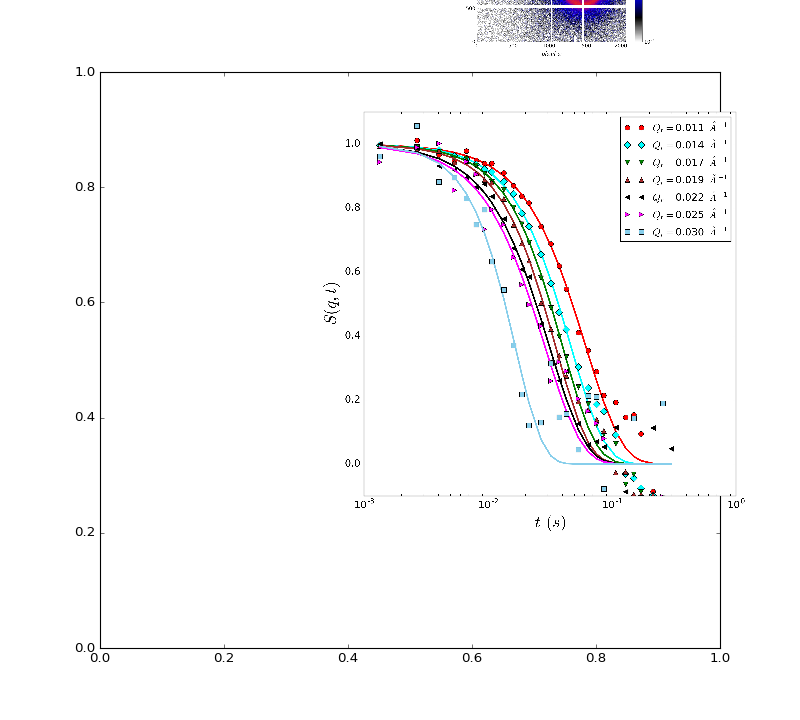

In [352]:
#figs = plt.figure(figsize=(  10, 12 ) )
#ax1 =   figs.add_subplot( 2,1,1 )
fig, ax = plt.subplots(  figsize=(  10, 9 ) )
fn = get_sample_data(  data_dir + 'G1_plot.png', asfileobj=False)
arr_img = plt.imread(fn ) #, format='png')

imagebox = OffsetImage(arr_img, zoom= 0.2 )
imagebox.image.axes = ax

xy = [0.,0]    
ab = AnnotationBbox(imagebox, xy,
                    xybox=( 400, 310 ),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    frameon=False,

                    )
ax.add_artist(ab)


fn = get_sample_data(  data_dir + 'img_avg_plot1.tif', asfileobj=False)
arr_img = plt.imread(fn ) #, format='png')

imagebox = OffsetImage(arr_img, zoom= 0.1 )
imagebox.image.axes = ax

xy = [0.,0]    
ab = AnnotationBbox(imagebox, xy,
                    xybox=( 420, 610 ),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    frameon=False,

                    )
ax.add_artist(ab)



In [354]:
#ls /XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/

In [355]:
#qvc = qval_dict.copy
qval_dict_ = {}
g2_fit_paras_ = []
for k in list( range( g2.shape[1] - 6   )) + [ 7 ]:
    qval_dict_[k] = qval_dict[k]
    g2_fit_paras_.append( g2_fit_paras['relaxation_rate'][k]  )

The fitted diffusion coefficient D0 is:  6.814e+04   A^2S-1


<IPython.core.display.Javascript object>


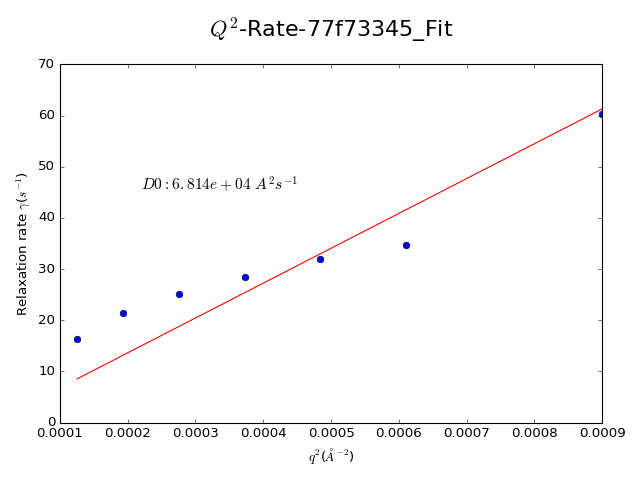

In [356]:
D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, 
                                           g2_fit_paras_,
                                           geometry= scat_geometry )
plot_q_rate_fit_general( qval_dict_, g2_fit_paras_,  qrate_fit_res, 
                geometry= scat_geometry,uid=uid, path= data_dir )

# Check images

In [96]:
uid = '77f73345'

In [97]:
md = get_meta_data( uid )
imgs = load_data( uid, md['detector'], reverse= True  )

In [103]:
mask_path = '/XF11ID/analysis/2016_3/masks/'
mask_name = 'Nov3_4M_mask.npy'
mask = load_mask(mask_path, mask_name, plot_ =  False, image_name = '_mask', reverse=True )
mask[:,2069] =0 # False  #Concluded from the previous results
mask_load=mask.copy()
imgsa = apply_mask( imgs, mask )

In [107]:
filename = '/XF11ID/analysis/Compressed_Data' +'/uid_%s.cmp'%md['uid'] 
mask, avg_img, imgsum, bad_frame_list = compress_eigerdata(imgs, mask, md, filename, 
         force_compress= False,  para_compress= True,  bad_pixel_threshold= 1e14,
                        bins=1, num_sub= 100, num_max_para_process= 500, with_pickle=True  )

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_77f73345-cf10-4808-a548-0ae311ca3b6c.cmp.


In [139]:
#show_img( imgsa[100],  vmin= 0.00001, vmax= .1, logs=True,  cmap = cmap_albula, 
#         image_name= '',  save=True, path=data_dir,  show_ticks = False,   aspect=1.0,      ) 

In [309]:
#%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/chx_generic_functions.py

<IPython.core.display.Javascript object>


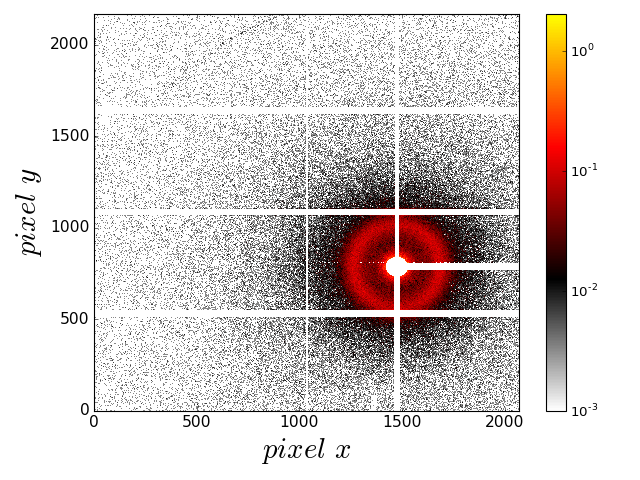

In [382]:
unit = 1 #1.333*10**(-3)

ax = plt.subplots(   )
show_img( avg_img/unit,  vmin= 0.001/unit, vmax= 2/unit, logs=True,  cmap = cmap_albula,
         image_name= '',  save=False, path=data_dir,  show_ticks = True,  ax=ax,  
         xlabel=r'$pixel$ $x$',ylabel=r'$pixel$ $y$', save_format='tif', dpi=300, file_name ='img_avg_plot0',
        ) 

fig, ax1 = ax

ax1.yaxis.label.set_size(26)
ax1.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize= 14)

plt.savefig( data_dir_tif + 'img_avg_plot0.tif', dpi= 300) 
#fig.tight_layout()

In [253]:
#ax=plt.subplots( figsize=(8, 6) )

#show_img( avg_img,  vmin= 0.001, vmax= 2, logs=True,  cmap = cmap_albula, aspect=1.0,
#         image_name= '',  save=True, path=data_dir,  show_ticks = False, ax = ax,        ) 

In [267]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

In [ ]:
ax.yaxis.label.set_size(26)
ax.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize=20)

<IPython.core.display.Javascript object>


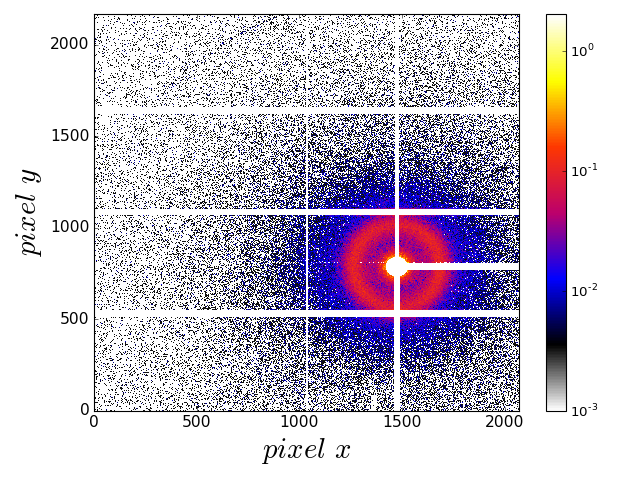

In [377]:

ax = plt.subplots(   )
show_img( avg_img/unit,  vmin= 0.001/unit, vmax= 2/unit, logs=True,  cmap = cmap_vge,
         image_name= '',  save=False, path=data_dir_tif,  show_ticks = True,  ax=ax,  
         xlabel=r'$pixel$ $x$',ylabel=r'$pixel$ $y$', save_format='tif', dpi=300, file_name ='img_avg_plot1',
        ) 
fig, ax1 = ax

ax1.yaxis.label.set_size(26)
ax1.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize= 14)

plt.savefig( data_dir_tif + 'img_avg_plot1.tif', dpi= 300) 
#fig.tight_layout()

# Plot q~Iq

In [283]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

In [141]:
q_saxs = extract_dict['q_saxs']
iq_saxs = extract_dict['iq_saxs']

<IPython.core.display.Javascript object>


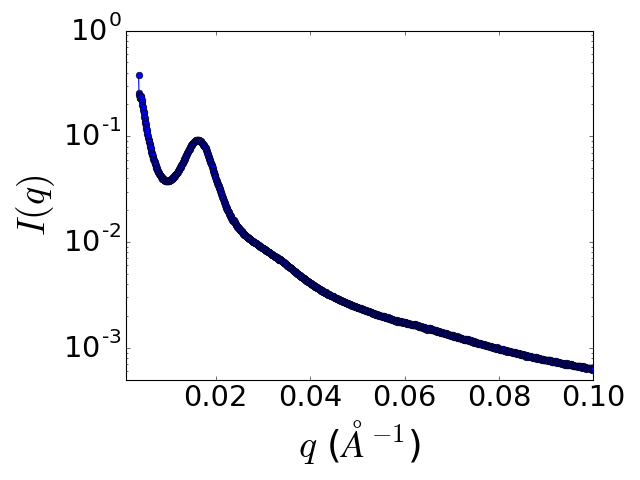

In [381]:
fig, ax=plt.subplots( figsize=(8,6) )
ax.semilogy(q_saxs,  iq_saxs , '-o') 
ax.set_xlabel(r'$q $ ('r'$\AA^{-1}$)', fontsize= 34  )        
ax.set_ylabel(r'$I(q)$', fontsize= 34 ) 

plt.xticks(  fontsize = 26 )
plt.yticks(  fontsize = 26 )
ax.set_xlim( 0.001, 0.1)
ax.set_ylim( 0.0005, 1)
fig.tight_layout()
#title = ax1.set_title('%s_Circular Average'%uid)  



plt.savefig( data_dir_tif + 'Iq_plot.tif', dpi= 300) 

In [336]:
suid_dict = {'Temp=25C_1' : 'f81955', 'Temp=25C_2' :'8a7e6f', 'Temp=25C_3' :'bd5e96', 'Temp=25C_4' :'8ab05f',
             'Temp=190C_h_3' :'22fe5c', 'Temp=190C_h_4' :'c5de86',  
             'Temp=180C_c_2' :'36b2d5', 'Temp=180C_c_3' :'034d26', 'Temp=180C_c_4' :'034bcb', 
            'Temp=175C_c_1' :'d062b0','Temp=175C_c_2' :'1ab5ac', 'Temp=175C_c_3' :'2edc75', 'Temp=175C_c_4' :'1f9c9c'
             }

In [337]:
uid_dict = {}
for u in list( suid_dict.keys() ):
    uid_dict[u] =  get_meta_data( suid_dict[u] )['uid']
print( uid_dict )

{'Temp=25C_4': '8ab05fc3-6aa6-4733-beeb-e6e93c3281af', 'Temp=175C_c_2': '1ab5ac99-7654-42bd-8696-7899627d3889', 'Temp=190C_h_3': '22fe5ce1-d8f5-4774-8bc2-cf1b56cba2ad', 'Temp=25C_1': 'f8195566-2933-42d1-a8ea-88871850b801', 'Temp=180C_c_3': '034d2680-177f-4009-a5e0-759880e8cd9a', 'Temp=190C_h_4': 'c5de86b9-349c-4165-8459-9cabdc0f63fa', 'Temp=175C_c_1': 'd062b06c-16ba-45a7-952a-414b46ead972', 'Temp=180C_c_2': '36b2d5cf-6b02-4518-94ad-dcbe745e220b', 'Temp=25C_3': 'bd5e9698-3188-4c75-8131-4670f71ec4f0', 'Temp=180C_c_4': '034bcbfa-fe0e-4d20-ad85-531731f66c04', 'Temp=25C_2': '8a7e6f71-ee20-4a6f-b3de-0c1ad8a6ad28', 'Temp=175C_c_4': '1f9c9c24-a20f-4be5-9d3c-f6e4be5c5ce0', 'Temp=175C_c_3': '2edc75b6-7207-4447-be27-433825c12240'}


# Extract result here

In [338]:
total_res = {}

In [339]:
for u in list( uid_dict.keys() ):
    inDir =  data_dir + suid_dict[u] + '/'
    total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_dict[u], import_dir = inDir )
    

In [340]:
print( total_res[list( uid_dict.keys() )[0]].keys()  )

dict_keys(['g4', 'imgsum', 'avg_img', 'g2_fit_paras', 'iq_saxs', 'g12b', 'iqst', 'roi_mask', 'q_saxs', 'tausb', 'taus4', 'pixel_mask', 'mask', 'qt', 'g2b', 'g2', 'taus', 'qval_dict_p', 'mean_int_sets', 'qval_dict', 'qval_dict_v', 'md', 'times_roi', 'bad_frame_list', 'g2b_fit_paras'])


# Do some analysis here

### 1) plot g4

In [341]:
qth_interest = 6 #3      #the intested single qth 

<IPython.core.display.Javascript object>


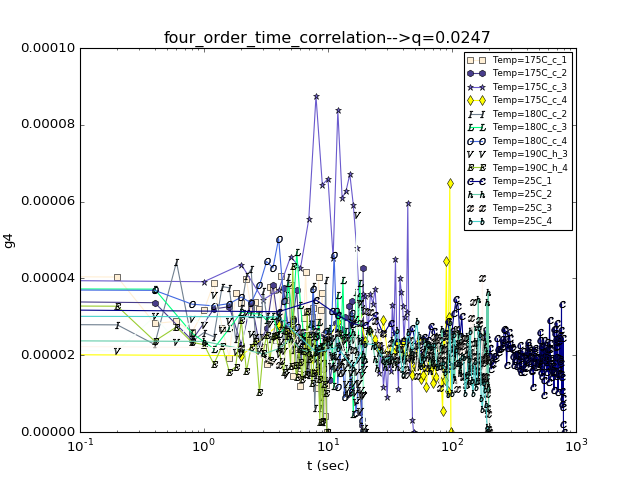

Temp=175C_c_1
Temp=175C_c_2
Temp=175C_c_3
Temp=175C_c_4
Temp=180C_c_2
Temp=180C_c_3
Temp=180C_c_4
Temp=190C_h_3
Temp=190C_h_4
Temp=25C_1
Temp=25C_2
Temp=25C_3
Temp=25C_4


In [342]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    print(u)
    plot1D( x =  total_res[u]['taus4'], y= total_res[u]['g4'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0, 0.0001], legend_size = 8, xlabel='t (sec)', ylabel='g4',
           title='four_order_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
    
plt.savefig( data_dir +'g4_101k44pc_190_180_175_25_new_1.png' )    

### 2) Load g2 and re-do fit

In [353]:
fit_g2_func = 'stretched'

for u in sorted(list( uid_dict.keys() )):
    g2 = total_res[u]['g2']
    taus = total_res[u]['taus']    
    g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':False, 'beta':True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta':0.05,'alpha':1.0,'relaxation_rate':0.01,})     
    g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= u  +'_g2_fit_paras.csv', path=data_dir )    
    #print( g2.shape)

The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_1_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_2_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_3_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_4_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=180C_c_2_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=180C_c_3_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=180C_c_4_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=190C_h_3_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=190C_h_4_g2_fit_paras.csv
The g2 fit

### 3) Plot g2

<IPython.core.display.Javascript object>


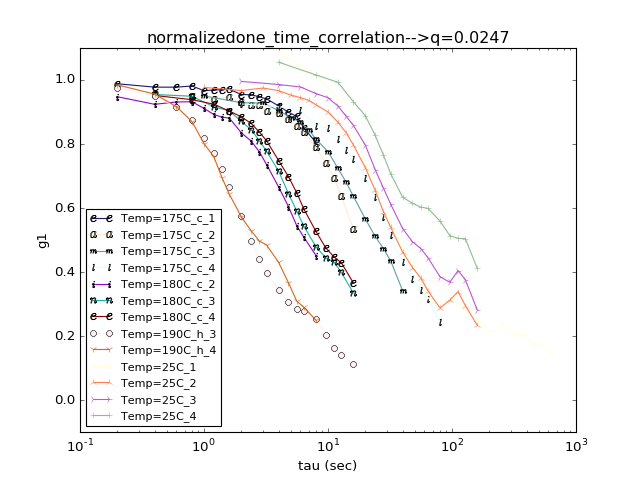

In [361]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    y= total_res[u]['g2'][1:,qth_interest]
    #ym = (y-y.min())/(y.max()-y.min())    
    
    #fits = total_res[u]['g2_fit_paras']  #here load from XPCS_Single Pipeline fit results
    fits = pds.read_csv( data_dir + u + '_g2_fit_paras.csv' )  #load from re-fit results
    
    ym = ( y -  fits['baseline'][qth_interest] )/ fits['beta'][qth_interest]    
    plot1D( x =  total_res[u]['taus'][1:], y= ym,
                   ax=ax, legend= u, ylim=[-0.1, 1.1], legend_size = 10, xlabel='tau (sec)', ylabel='g1',
           title='normalized' +'one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'normalized'+'g__101k44pc_190_180_175_25_new_.png' ) 

<IPython.core.display.Javascript object>


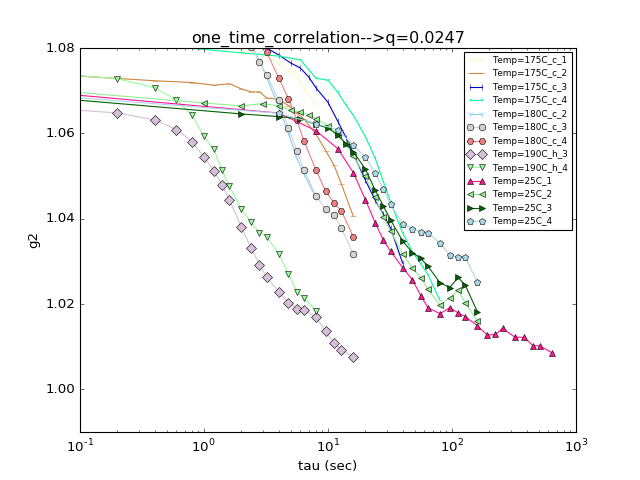

In [362]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    plot1D( x =  total_res[u]['taus'], y= total_res[u]['g2'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0.99, 1.08], legend_size = 8, xlabel='tau (sec)', ylabel='g2',
           title='one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'g2_101k44pc_190_180_175_25_new.png' )  

### 4) Plot q~relaxation time

In [333]:
qs = np.array([total_res[u]['qval_dict'][i][0] for i in range(   len(list(total_res[u]['qval_dict'].keys()))   ) ])

<IPython.core.display.Javascript object>


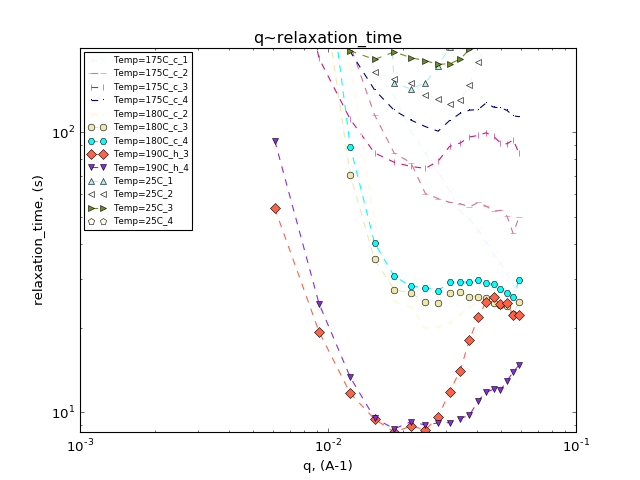

In [365]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    x= qs
    
    #y= 1/total_res[u]['g2_fit_paras']['relaxation_rate']  #here load from XPCS_Single Pipeline fit results
    y =  1/ ( pds.read_csv( data_dir + u + '_g2_fit_paras.csv' )['relaxation_rate'] ) #load from re-fit results
    
    #print(y)
    plot1D( x =  qs, y= y, ax=ax, ylim=[0,200], legend= u, legend_size = 8, ls = '--',
           xlabel='q, (A-1)', ylabel='relaxation_time, (s)',
           title='q~relaxation_time', logx=True, logy=True )
plt.savefig( data_dir +'q~relaxation_time.png' )  